In [298]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import glob
import os
import json
import ast
import imageio
from tabulate import _table_formats, tabulate

%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))
import re
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)',text) ]



def see_table_formats():
    format_list = list(_table_formats.keys())
    # current format list in tabulate version 0.8.3:
    # ['simple', 'plain', 'grid', 'fancy_grid', 'github', 'pipe', 'orgtbl', 'jira', 'presto', 'psql', 'rst', 'mediawiki', 'moinmoin', 'youtrack', 'html', 'latex', 'latex_raw', 'latex_booktabs', 'tsv', 'textile']


    # Each element in the table list is a row in the generated table
    table = [["spam",42], ["eggs", 451], ["bacon", 0]]
    headers = ["item", "qty"]

    for f in format_list:
        print("\nformat: {}\n".format(f))
        print(tabulate(table, headers, tablefmt=f))
see_table_formats()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



format: simple

item      qty
------  -----
spam       42
eggs      451
bacon       0

format: plain

item      qty
spam       42
eggs      451
bacon       0

format: grid

+--------+-------+
| item   |   qty |
+========+=======+
| spam   |    42 |
+--------+-------+
| eggs   |   451 |
+--------+-------+
| bacon  |     0 |
+--------+-------+

format: fancy_grid

╒════════╤═══════╕
│ item   │   qty │
╞════════╪═══════╡
│ spam   │    42 │
├────────┼───────┤
│ eggs   │   451 │
├────────┼───────┤
│ bacon  │     0 │
╘════════╧═══════╛

format: github

| item   |   qty |
|--------|-------|
| spam   |    42 |
| eggs   |   451 |
| bacon  |     0 |

format: pipe

| item   |   qty |
|:-------|------:|
| spam   |    42 |
| eggs   |   451 |
| bacon  |     0 |

format: orgtbl

| item   |   qty |
|--------+-------|
| spam   |    42 |
| eggs   |   451 |
| bacon  |     0 |

format: jira

|| item   ||   qty ||
| spam   |    42 |
| eggs   |   451 |
| bacon  |     0 |

format: presto

 item   |   qty
--

In [299]:
in_path = './6b_data/output/triangle/parameters.json'
with open(in_path, 'r') as f:
    params = json.load(f)

print(len(params), 'settings')
param_keys = list(params[0].keys())
print(param_keys)
for k, v in params[0].items():
    print('  {}: {}'.format(k, v))

288 settings
['index', 'nnParameter_type', 'image_size', 'num_cams', 'batch_size', 'use_texture', 'texturemap_size', 'loss_type', 'faces_per_pixel', 'target_offset', 'blur_radius', 'sigma', 'gamma', 'lr', 'use_scheduler']
  index: 0
  nnParameter_type: translate
  image_size: 128
  num_cams: 1
  batch_size: 1
  use_texture: False
  texturemap_size: 32
  loss_type: a
  faces_per_pixel: 1
  target_offset: 0.25
  blur_radius: 0
  sigma: 0.0001
  gamma: 0.0001
  lr: 0.005
  use_scheduler: True


# Plot all

In [306]:
def chomp(x):
    if x.endswith("\n"): return x[:-1]
    return x

def str2array(s):
    # Remove space after [
    s=re.sub('\[ +', '[', s.strip())
    # Replace commas and spaces
    s=re.sub('[,\s]+', ', ', s)
    return np.array(ast.literal_eval(s))
def read_data_txt(path):
    left = 'array('
    right = ', dtype'

    dict_out = {}
    with open(path, 'r') as f:
        lines = f.readlines()
        keys = lines[1].split(';')
        for i in range(len(keys)):
            keys[i] = keys[i].rstrip('\n')
            dict_out[keys[i]] = []
            
        for l in lines[2:]:
            v = l.split(';')
            for i in range(len(keys)):
                if i >= len(v):
                    return None
                val = v[i].rstrip('\n')
                if 'array' in val:
                    val = val[val.index(left)+len(left):val.index(right)]
                    val = str2array(val)
                else:
                    try:
                        val = float(val)
                    except:
                        pass
                dict_out[keys[i]].append(val)
    return dict_out      
            
in_dir = './6b_data/output/triangle/setting_'

data = {}
for p in params:
    i = p['index']
    in_path = in_dir + '{}/data_*.txt'.format(i)
    in_paths = glob.glob(in_path)
    if len(in_paths) != 1:
        continue
    d = read_data_txt(in_paths[0])
    if d is not None:
        data[i] = d
print('{}/{} fetched'.format(len(data.keys()), len(params)))
data_keys = list(data[list(data.keys())[0]].keys())
print(data_keys)

loss_max = -1
grad_max = -1
for v in data.values():
    loss_max = max(loss_max, max(max(v['loss_true']), max(v['loss'])))
    grad_max = max(grad_max, max(v['grad_norm']))

ValueError: malformed node or string: <_ast.Name object at 0x000002594960FC10>

total=16, n_batch=1, batch_size=10


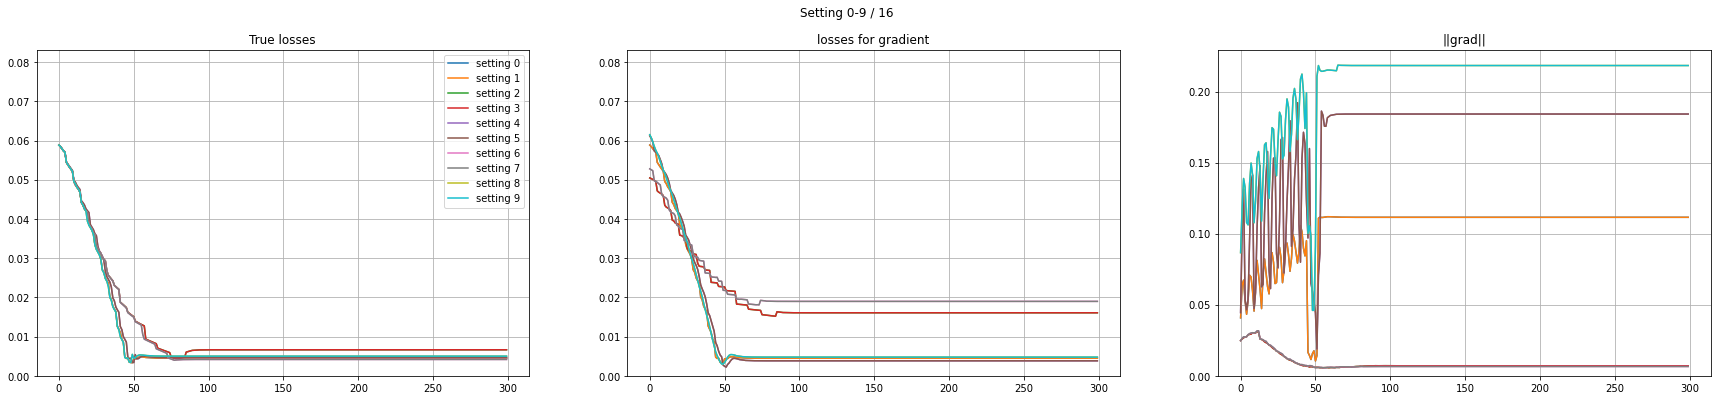

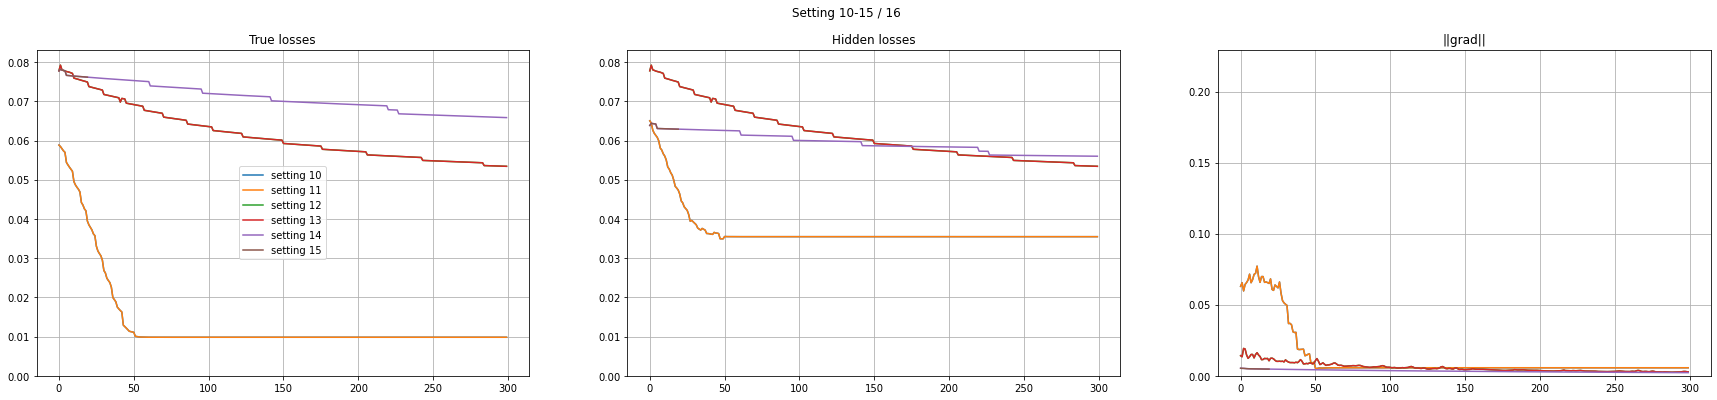

6


In [305]:
e_max = 300

batch_size = 10
keys = list(data.keys())
n_batch = len(keys) // batch_size
non_batch = len(keys) % batch_size
print('total={}, n_batch={}, batch_size={}'.format(len(keys), n_batch, batch_size))
for batch_idx in range(0, n_batch):
    i0 = batch_idx*batch_size
    i1 = i0 + batch_size
    fig, ax = plt.subplots(1, 3, figsize=(30, 6))
    legend_str = []
    for i in range(i0, i1):
        k = keys[i]
        v = data[k]
        ax[0].plot(v['loss_true'][0:e_max])
        ax[1].plot(v['loss'][0:e_max])
        ax[2].plot(v['grad_norm'][0:e_max])
        legend_str.append('setting {}'.format(k))
    ax[0].set_title('True losses')
    ax[0].grid()
    ax[0].set_ylim([0, loss_max*1.05])
    ax[1].set_title('losses for gradient')
    ax[1].grid()
    ax[1].set_ylim([0, loss_max*1.05])
    ax[2].grid()
    ax[2].set_title('||grad||')
    ax[2].set_ylim([0, grad_max*1.05])
    plt.suptitle('Setting {}-{} / {}'.format(i0, i1-1, len(keys)))
    ax[0].legend(legend_str)
    plt.show()

fig, ax = plt.subplots(1, 3, figsize=(30, 6))
legend_str = []
for i in range(n_batch*batch_size, len(keys)):
    k = keys[i]
    v = data[k]
    ax[0].plot(v['loss_true'][0:e_max])
    ax[1].plot(v['loss'][0:e_max])
    ax[2].plot(v['grad_norm'][0:e_max])
    legend_str.append('setting {}'.format(k))
ax[0].set_title('True losses')
ax[0].grid()
ax[0].set_ylim([0, loss_max*1.05])
ax[1].set_title('Hidden losses')
ax[1].grid()
ax[1].set_ylim([0, loss_max*1.05])
ax[2].grid()
ax[2].set_title('||grad||')
ax[2].set_ylim([0, grad_max*1.05])
plt.suptitle('Setting {}-{} / {}'.format(n_batch*batch_size, len(keys)-1, len(keys)))
ax[0].legend(legend_str)
plt.show()
    
print(len(legend_str))

In [292]:
data_converged = {}
data_not_converged = {}
for i in range(len(keys)):
    k = keys[i]
    v = data[k]
    last_loss = v['loss_true'][-1]
    if last_loss < 0.02:
        data_converged[k] = v
    else:
        data_not_converged[k] = v
print(len(data_converged.keys()), 'converged,', len(data_not_converged.keys()), 'not converged')

6 converged, 6 not converged


In [293]:
from IPython.display import HTML, display
import tabulate

table =[['t1', 't2']]
table.append(['v1', 'v2'])
table.append(['v1', 'v2'])
display(HTML(tabulate.tabulate(table, tablefmt='html', headers='firstrow')))

In [294]:
def draw_data_table(param_keys, params, data):
    table = []
    t = []
    for k in param_keys:
        t.append(k)

    t.append('true loss')
    table.append(t)

    for k, v in data.items():
        p = params[k]
        t = []
        # add parameters
        for pk in param_keys:
            pv = p[pk]
            t.append(pv)

        # add data
        loss = v['loss_true']
        t.append(loss[-1])
        table.append(t)
    display(HTML(tabulate(table, tablefmt='html', headers='firstrow')))
print('converged')
draw_data_table(param_keys, params, data_converged)
print('not converged')
draw_data_table(param_keys, params, data_not_converged)

converged


TypeError: 'module' object is not callable

In [295]:
plot_dir = './6b_data/output/triangle_keep1'

def load_plots(p_dir, setting_indices, img_idx):
    plots = []
    for idx in setting_indices:
        pdir = plot_dir + '/setting_{}/*.png'.format(idx)
        plot_paths = glob.glob(pdir)
        plot_paths.sort(key=natural_keys)
        plot_path = plot_paths[img_idx]
        plot_img = imageio.imread(plot_path)
        plots.append(plot_img)
    return plots
plots_converged1 = load_plots(plot_dir, list(data_converged.keys()), 0)
plots_not_converged1 = load_plots(plot_dir, list(data_not_converged.keys()), 0)
plots_converged2 = load_plots(plot_dir, list(data_converged.keys()), -1)
plots_not_converged2 = load_plots(plot_dir, list(data_not_converged.keys()), -1)

print(len(plots_converged2), 'converged,', len(plots_not_converged2), ' not converged.')

6 converged, 6  not converged.


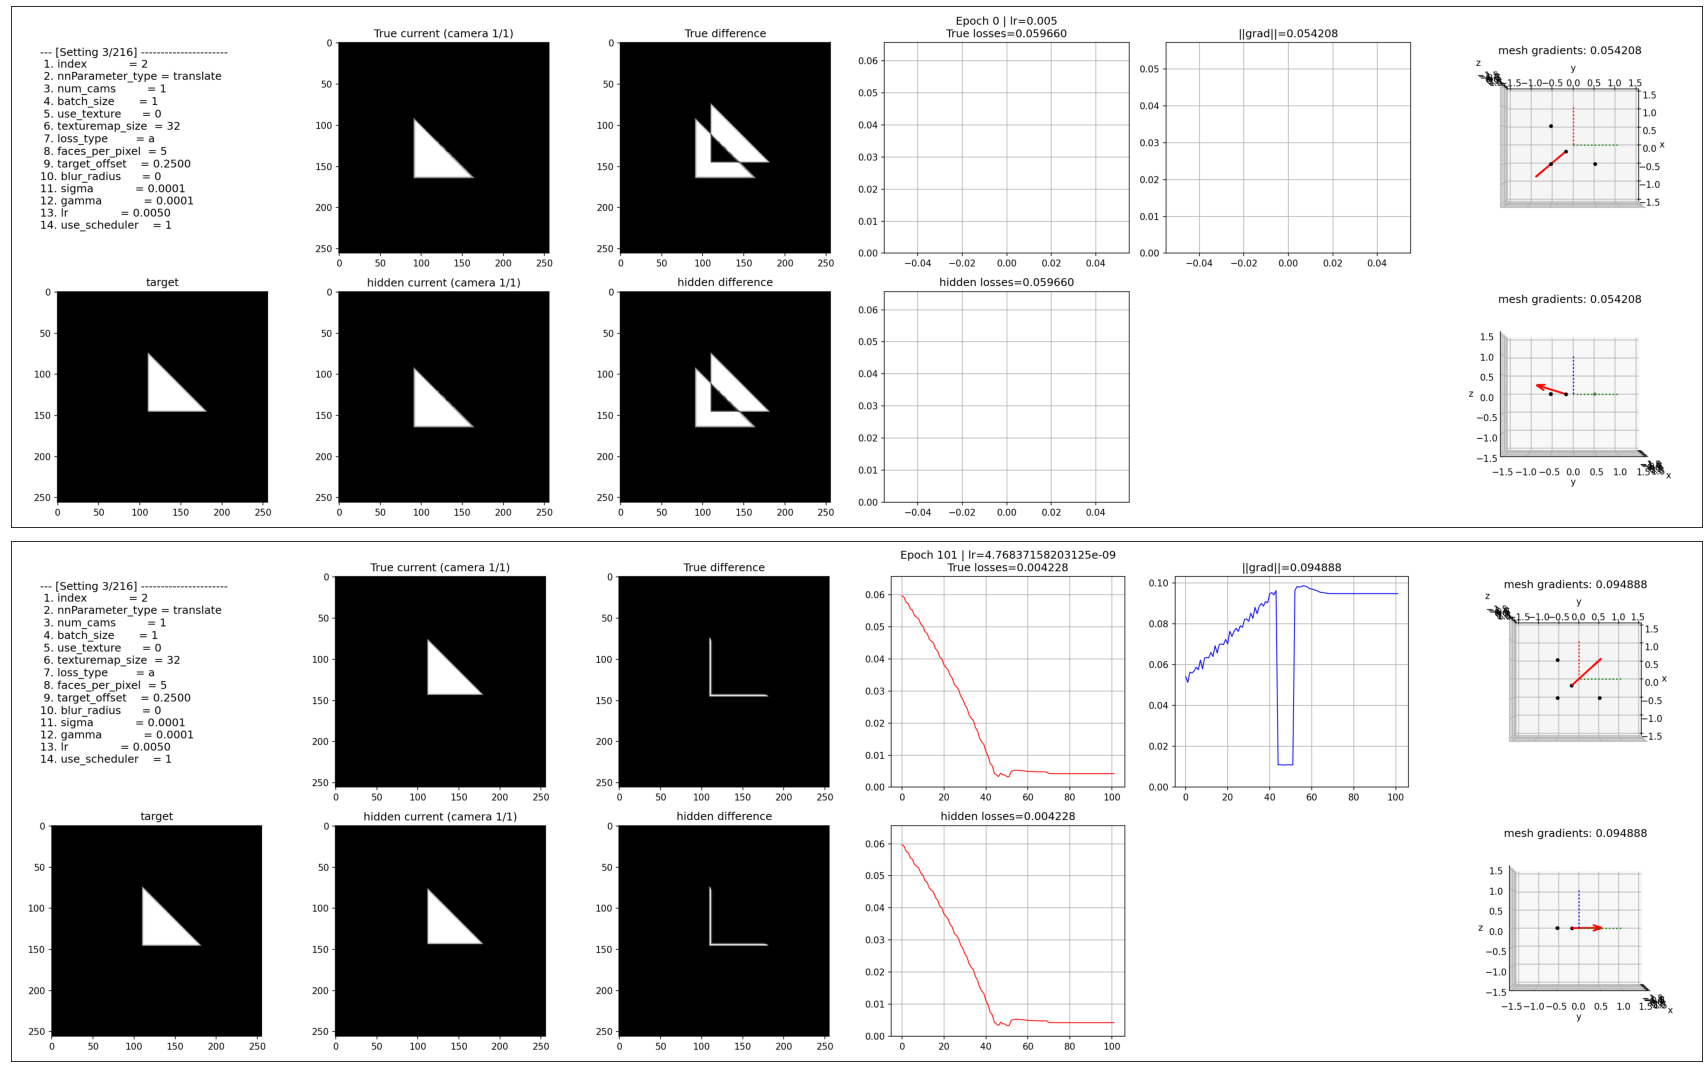

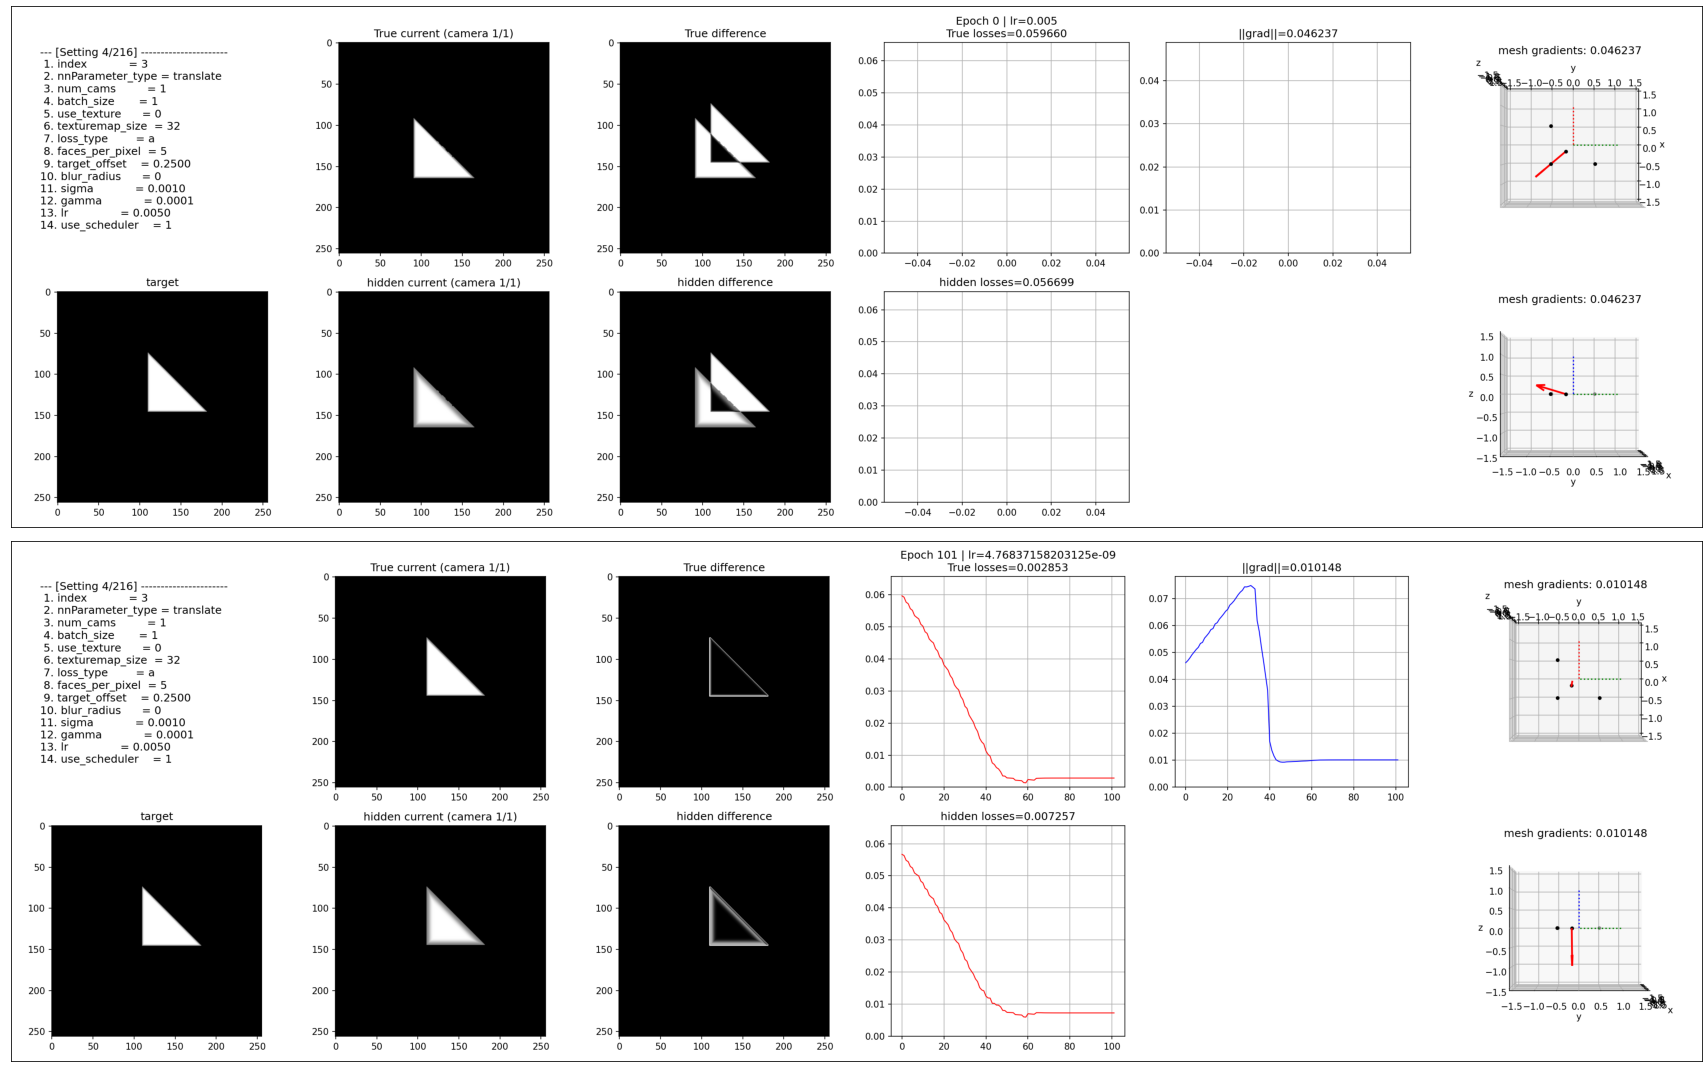

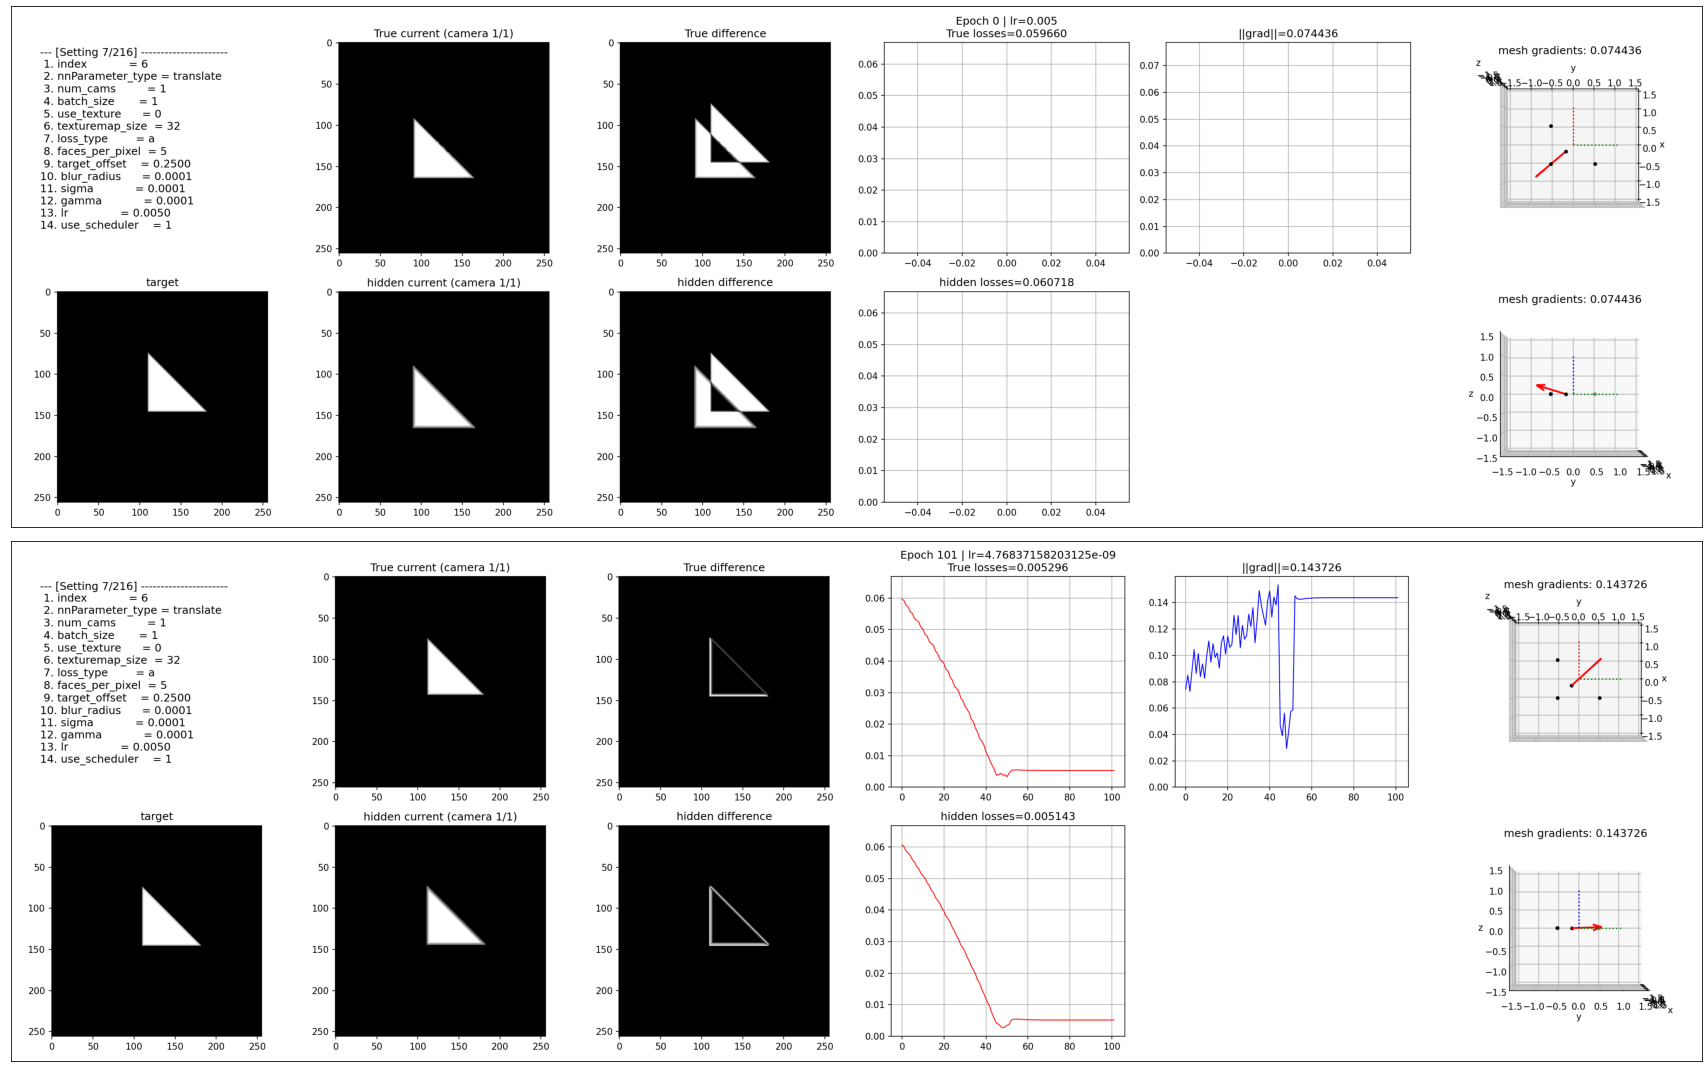

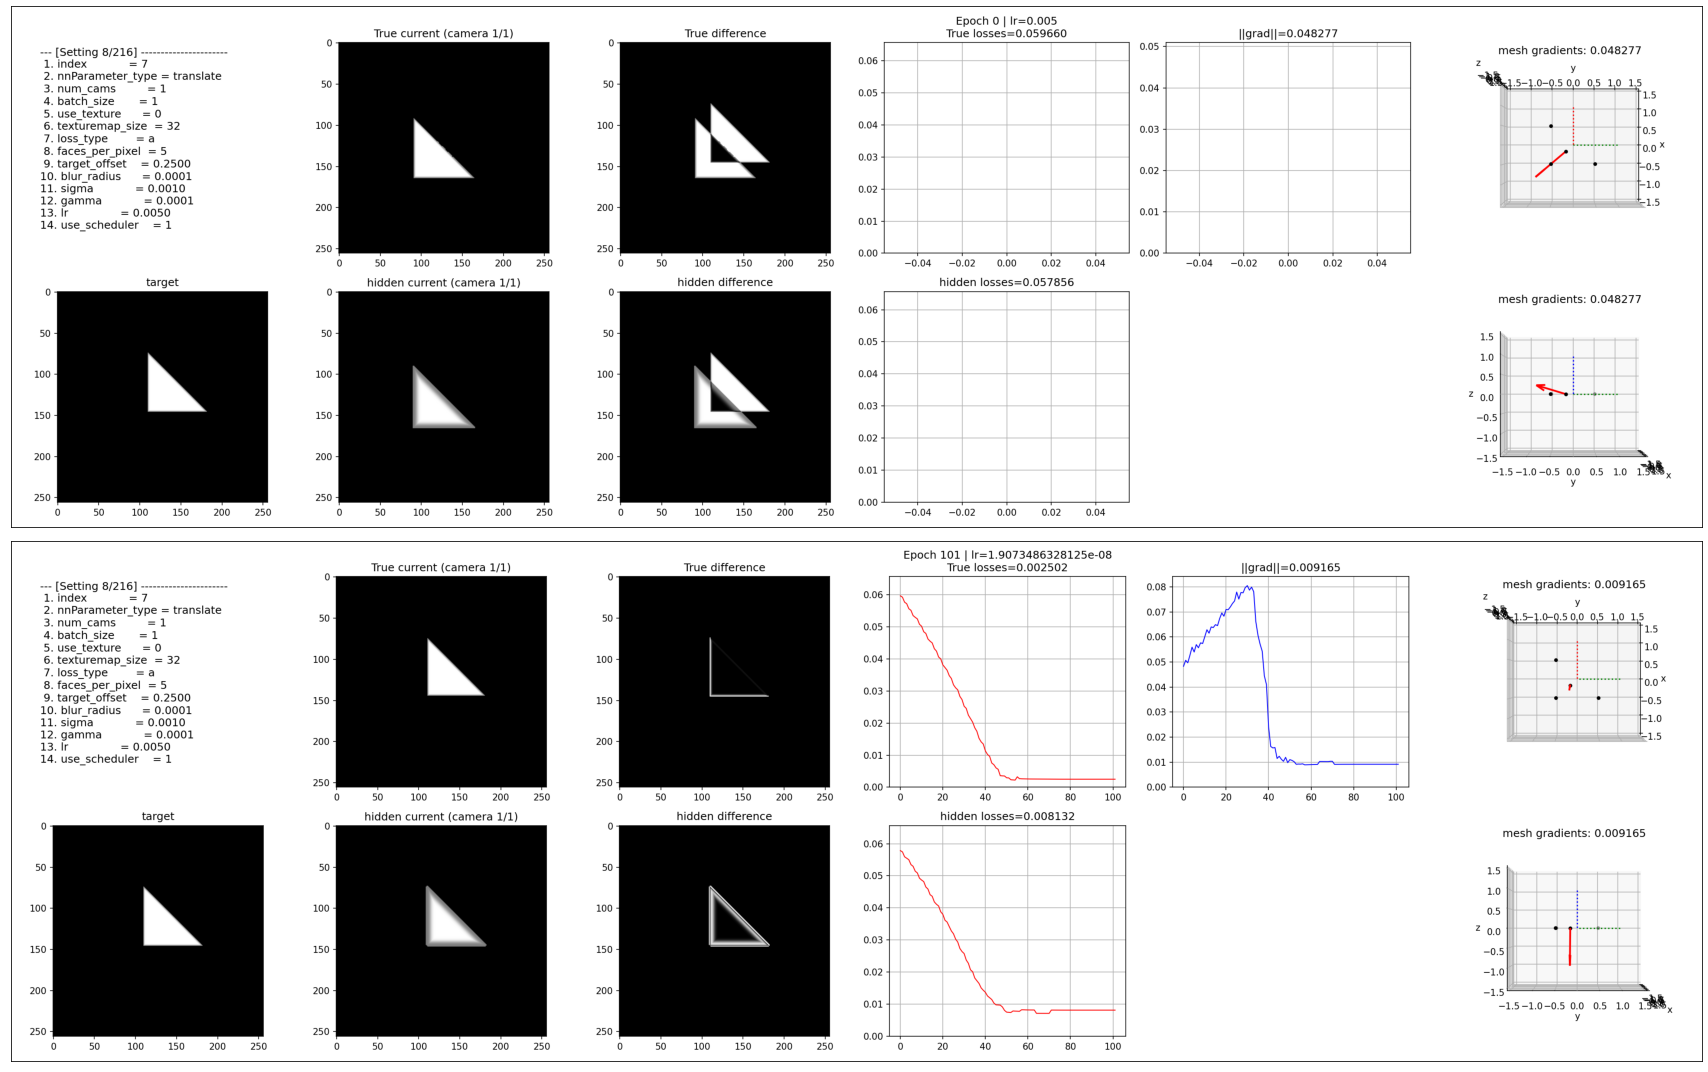

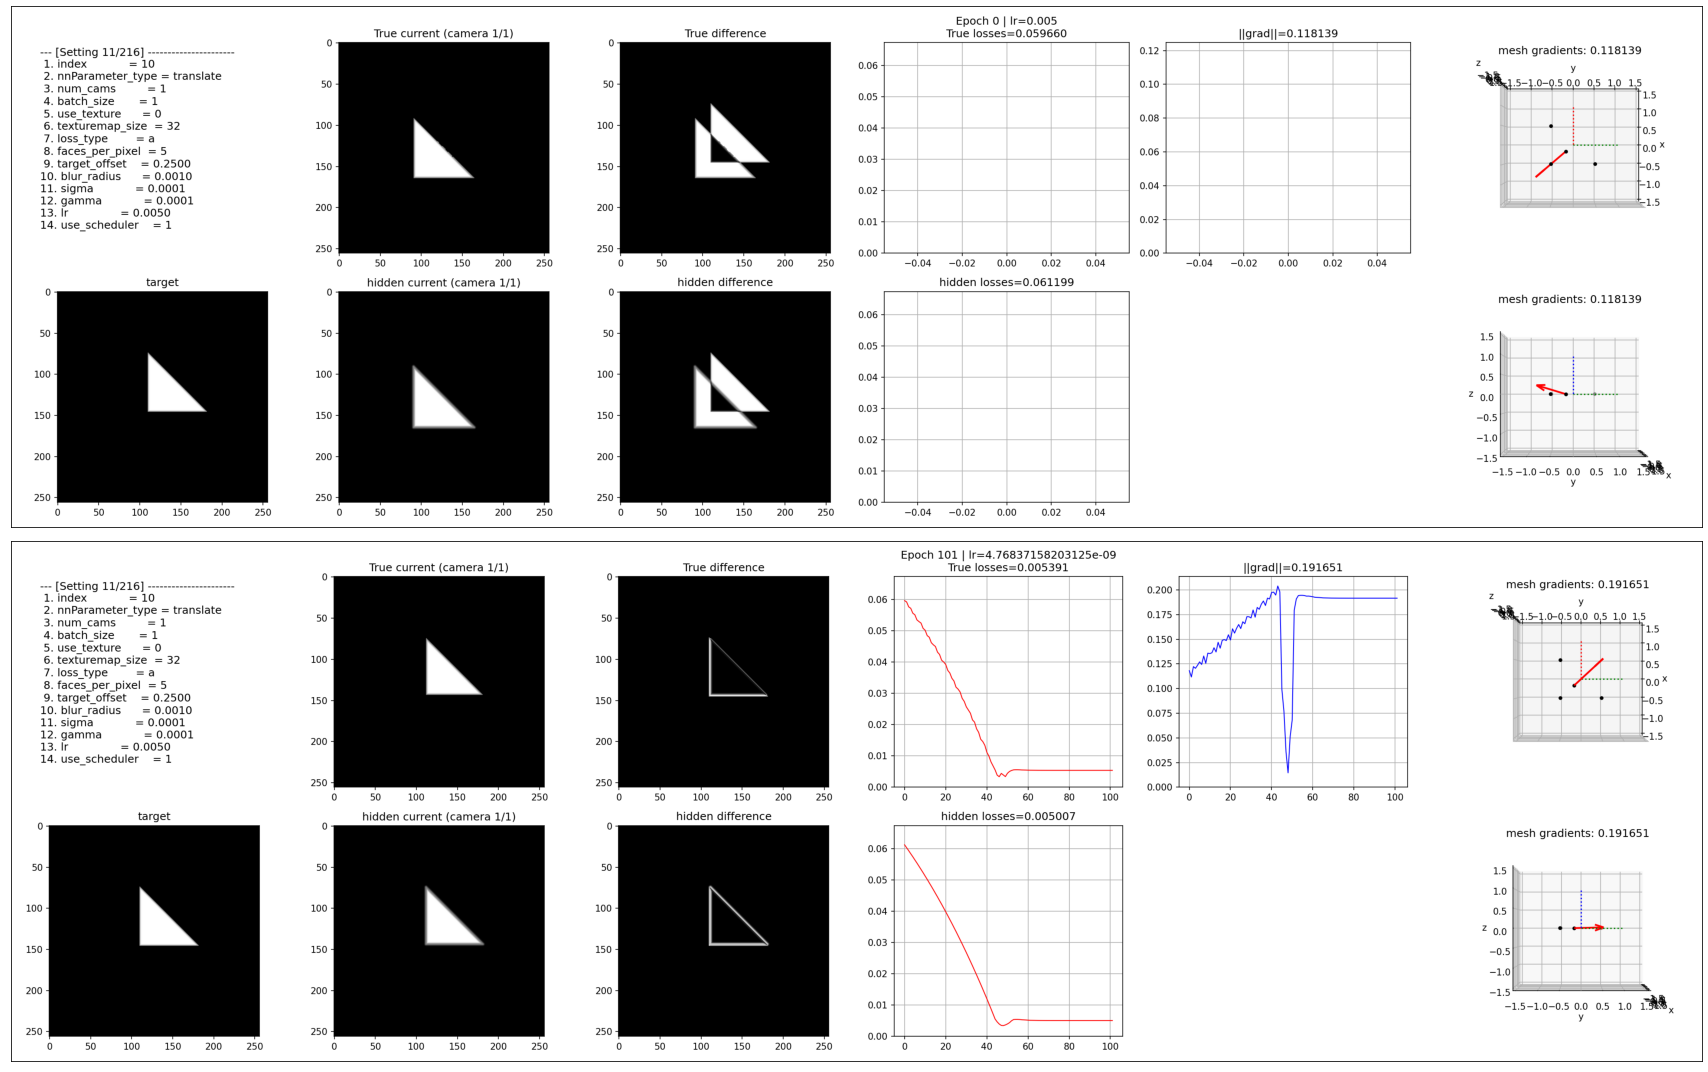

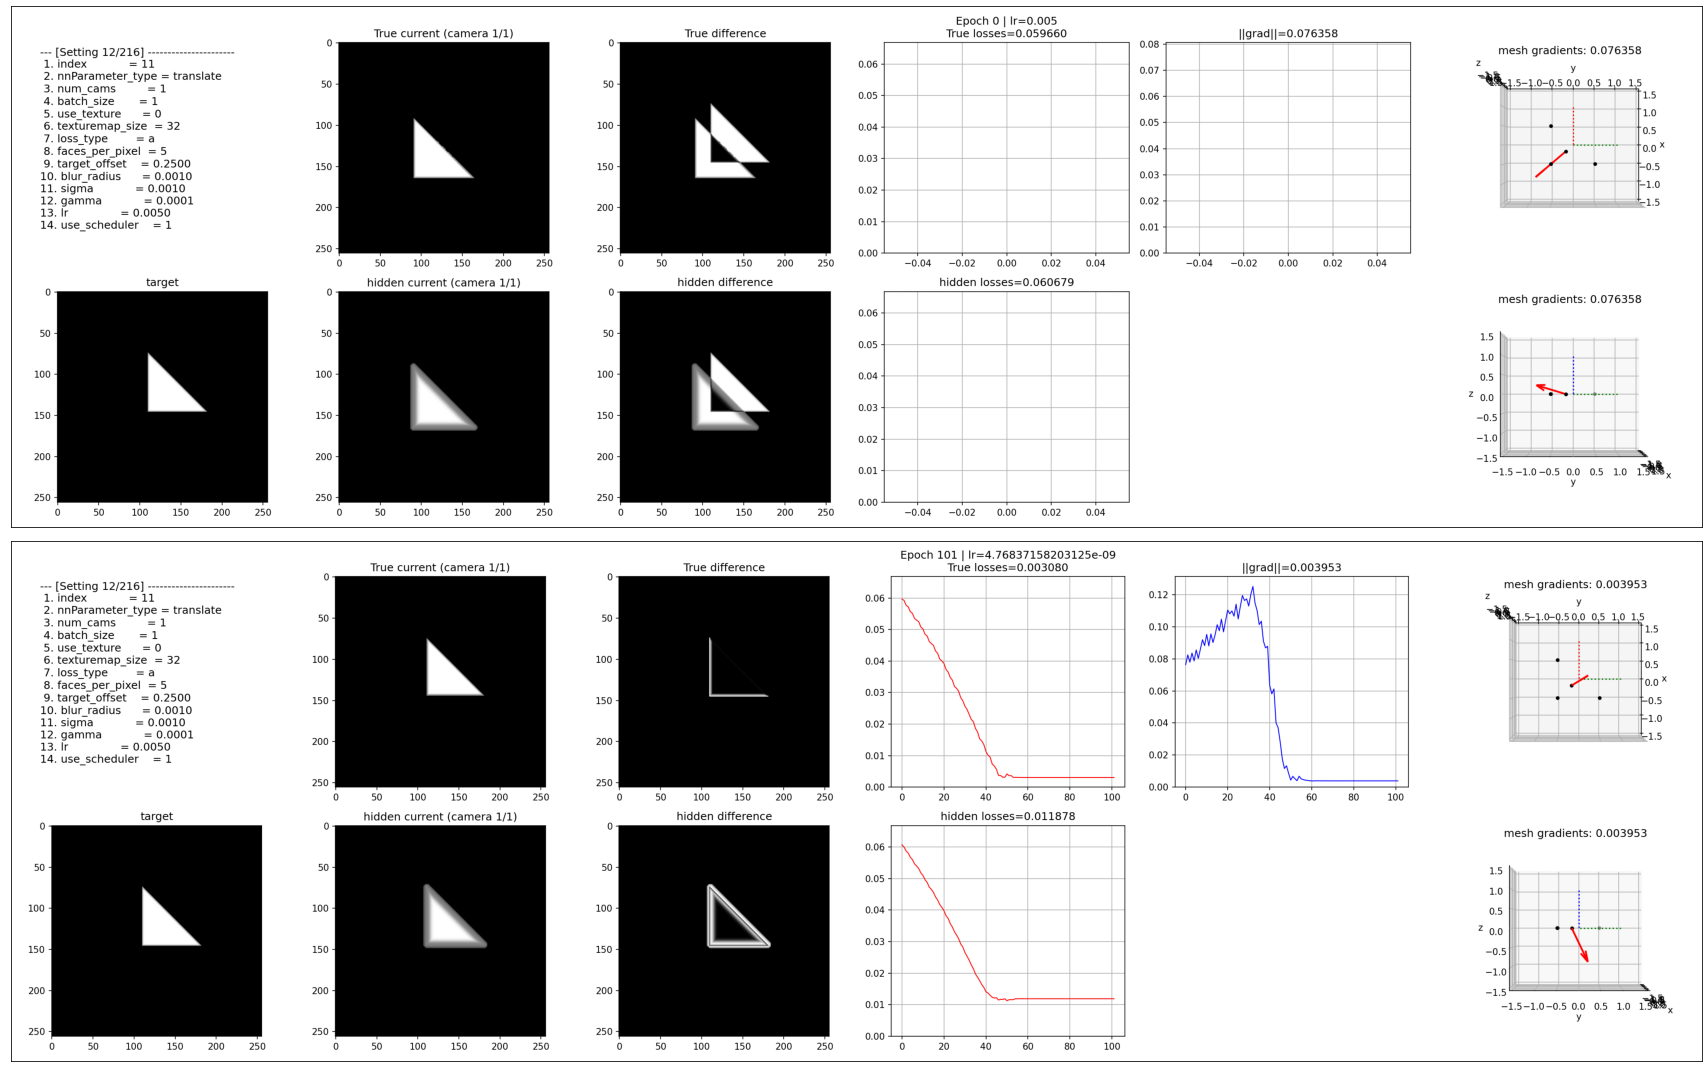

In [296]:
for i in range(len(plots_not_converged1)):
    fig, ax = plt.subplots(2, 1, figsize=(30, 15), tight_layout=True)
    ax[0].imshow(plots_not_converged1[i])
    ax[1].imshow(plots_not_converged2[i])
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()
    print()

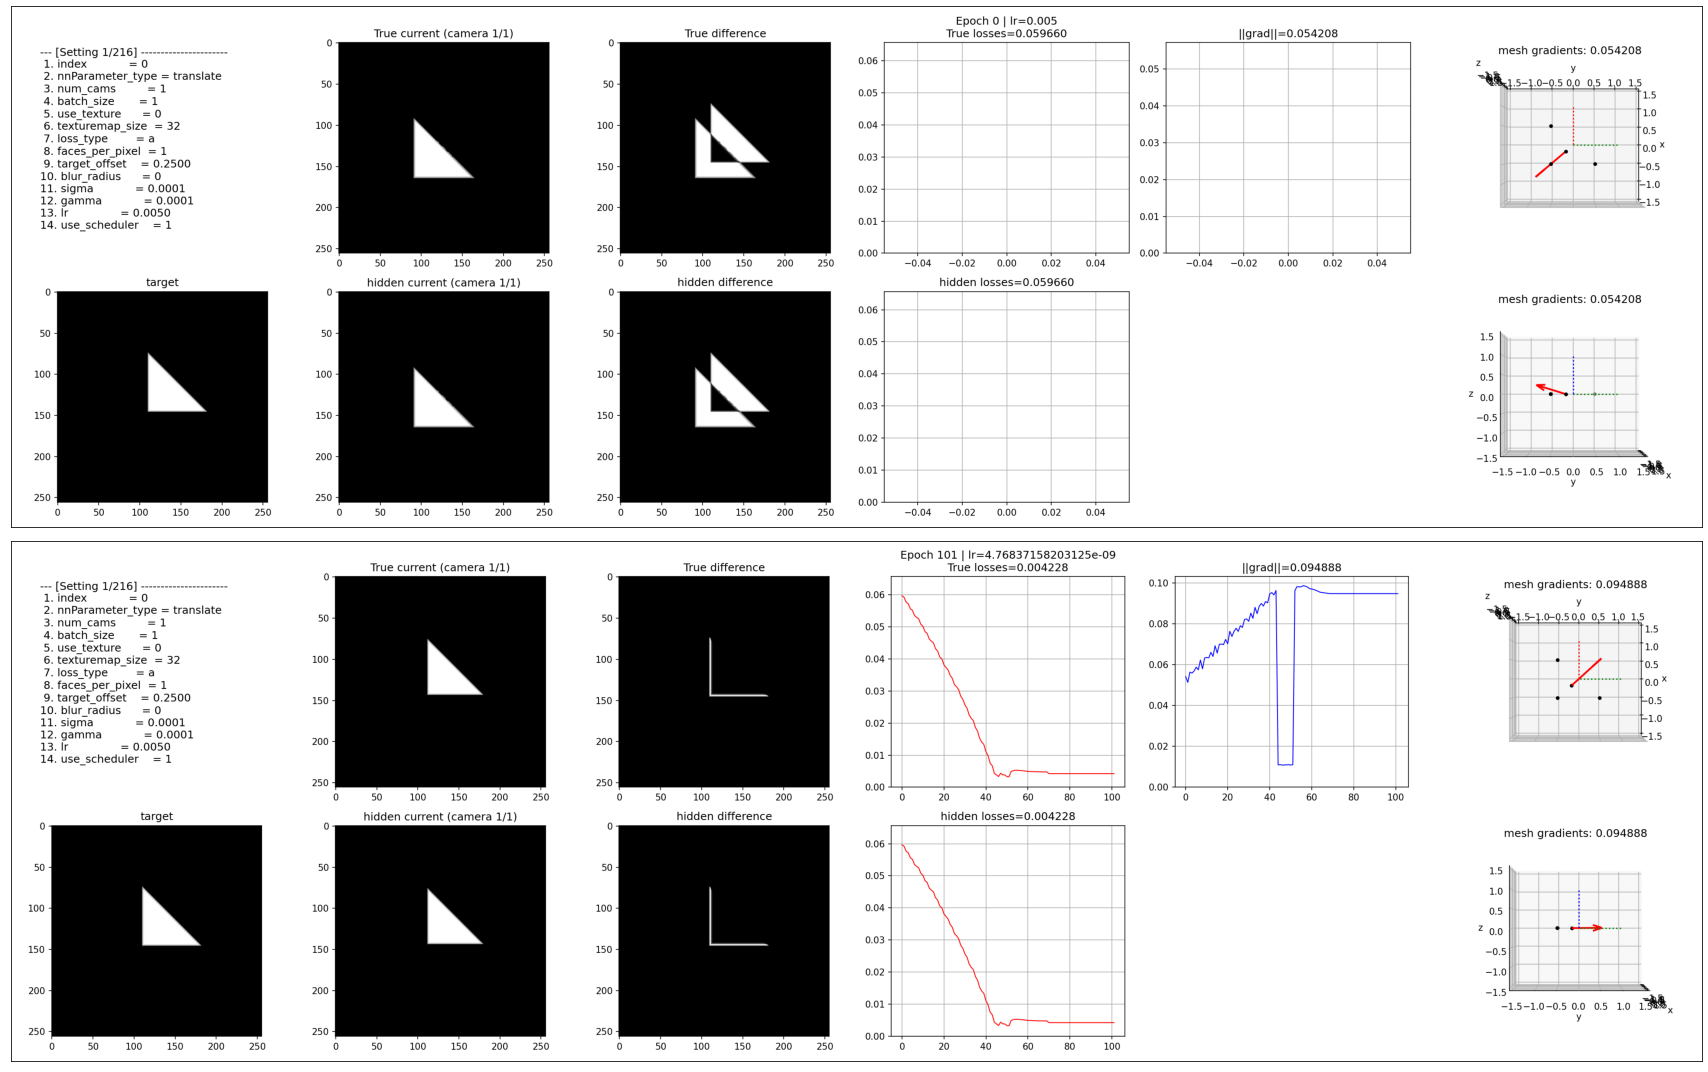

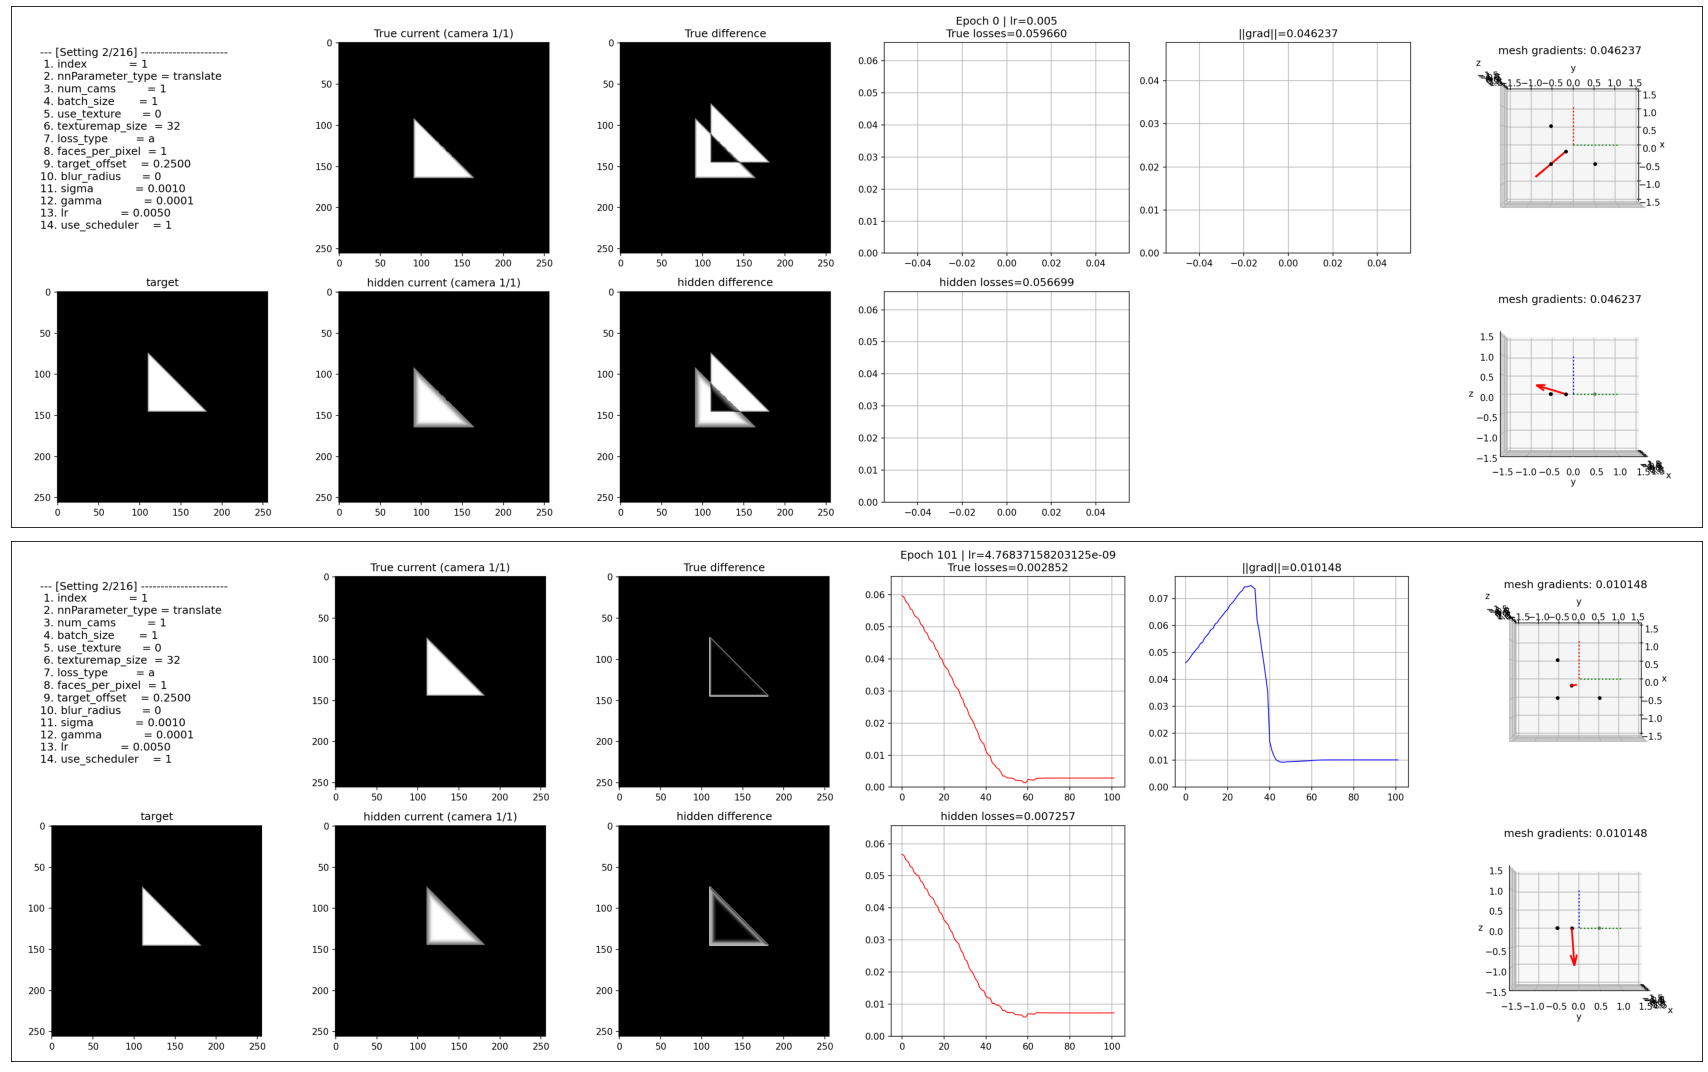

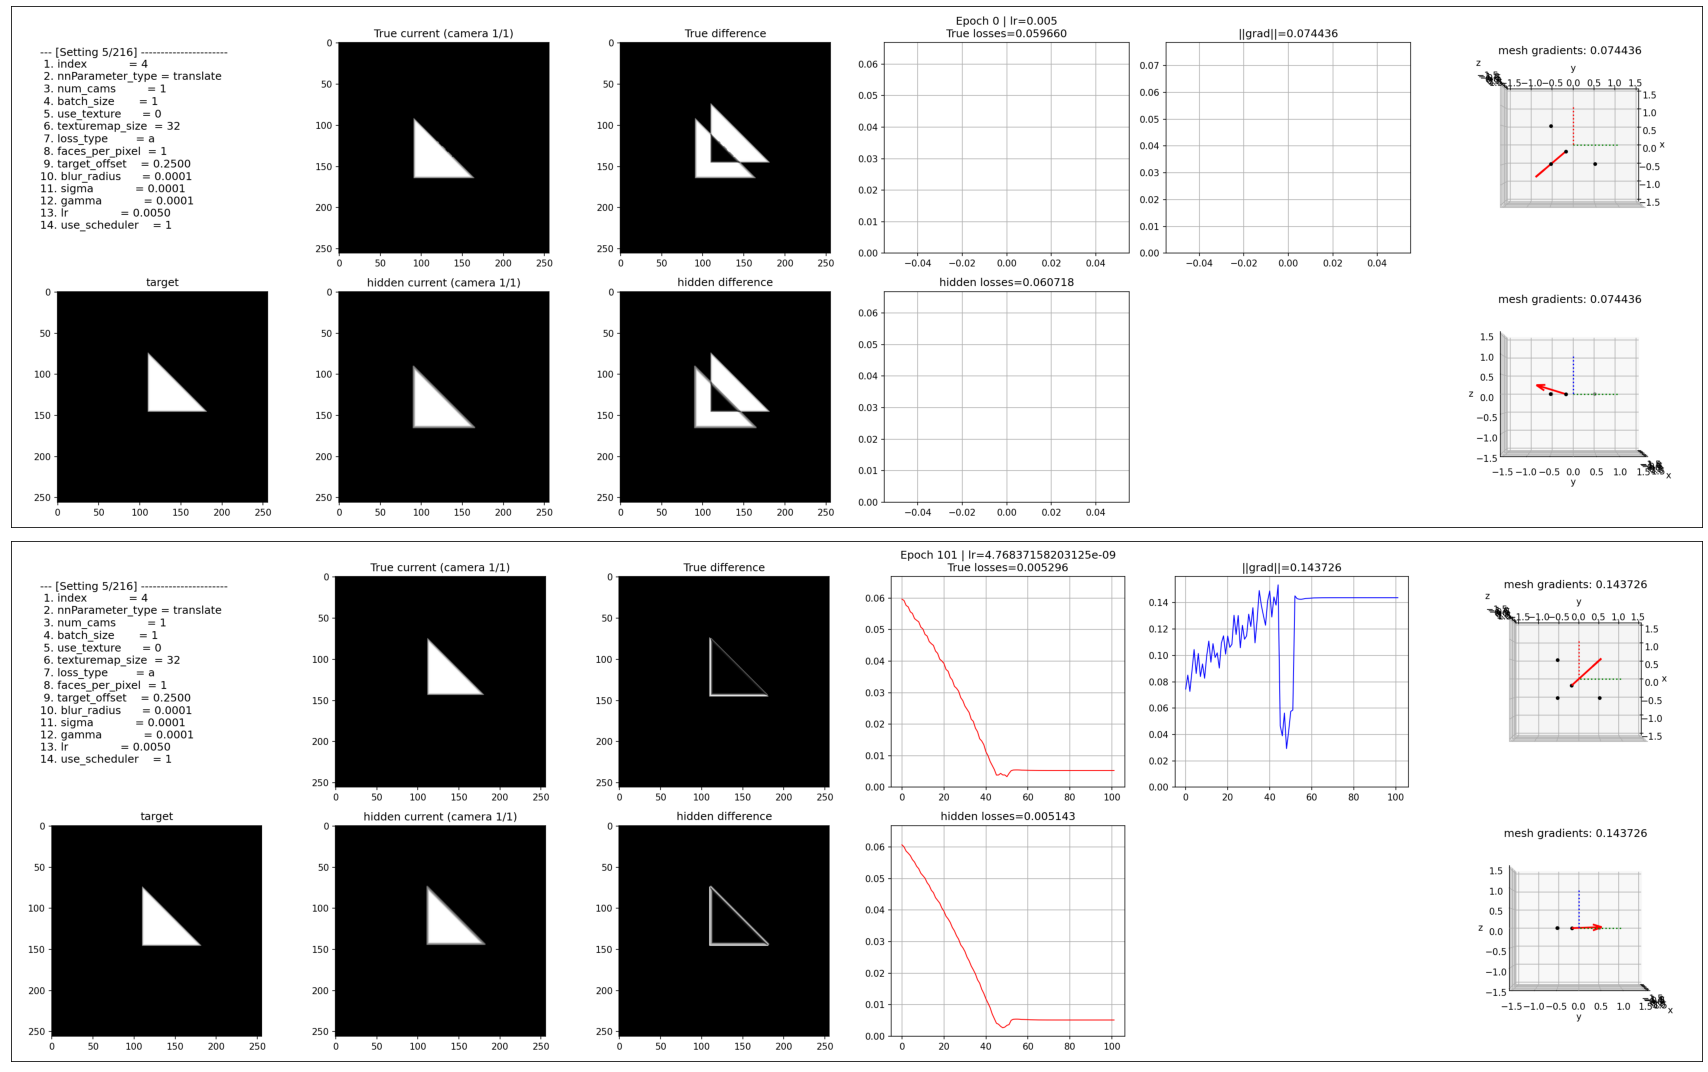

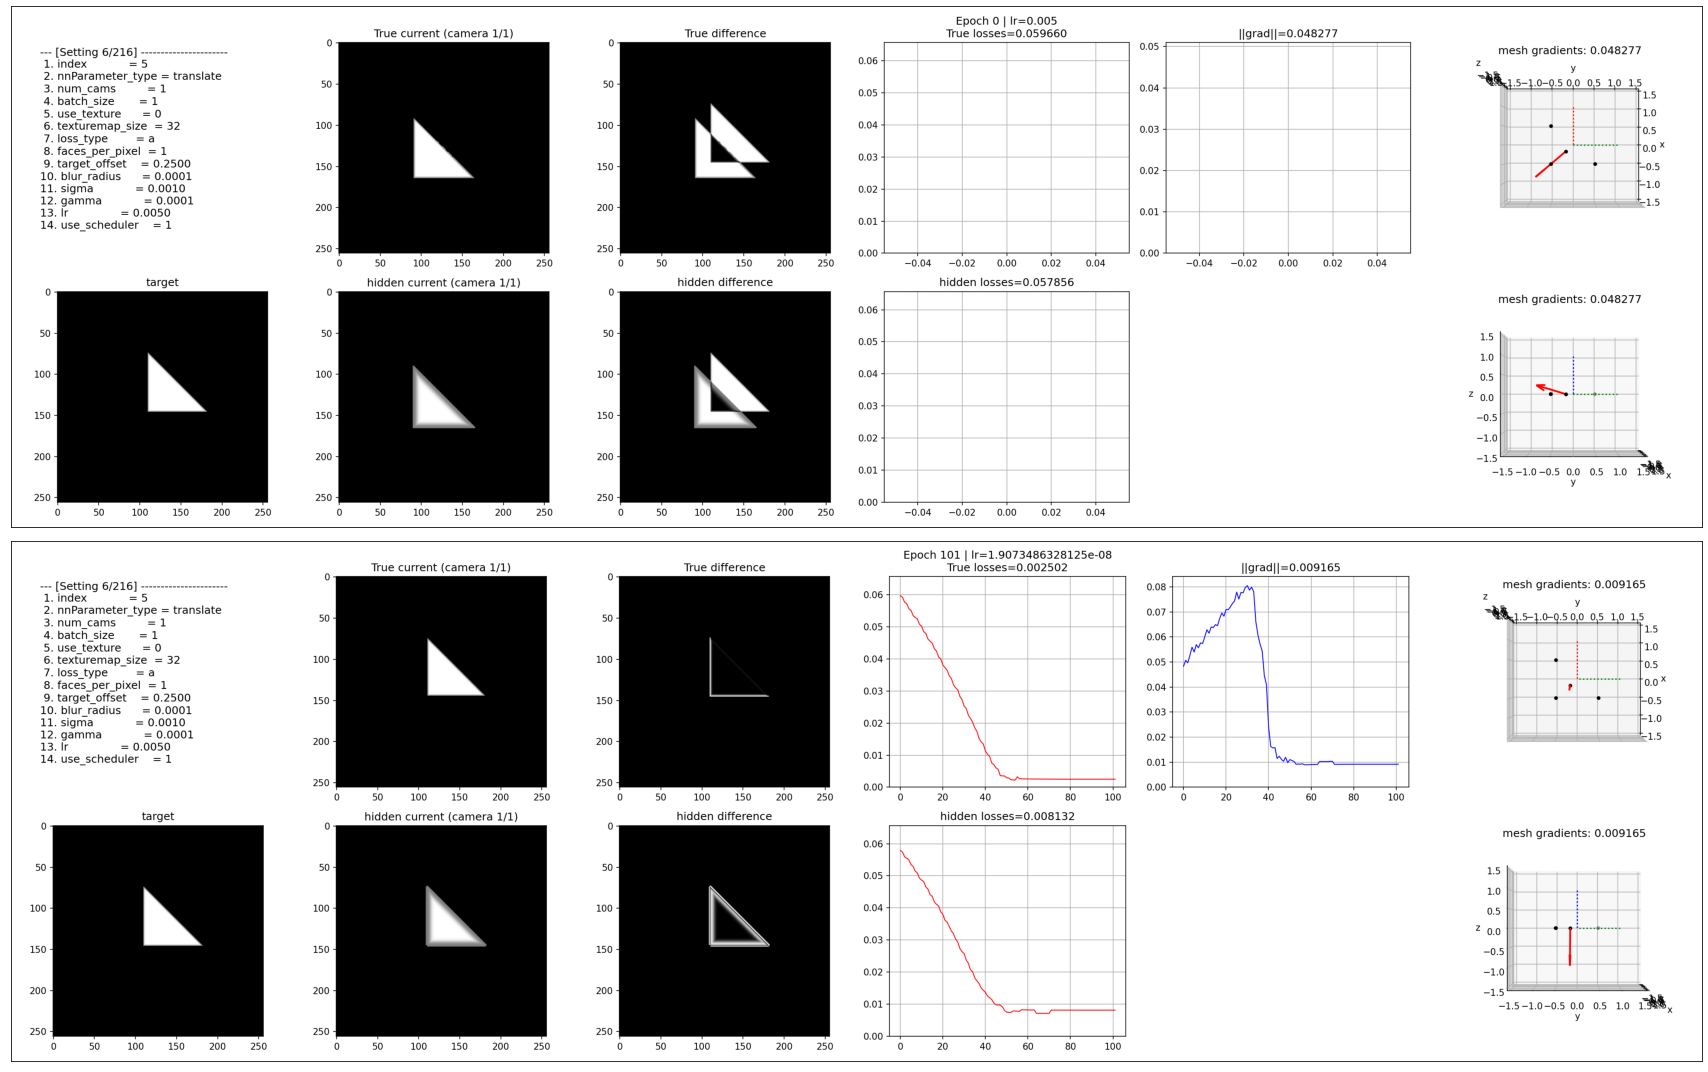

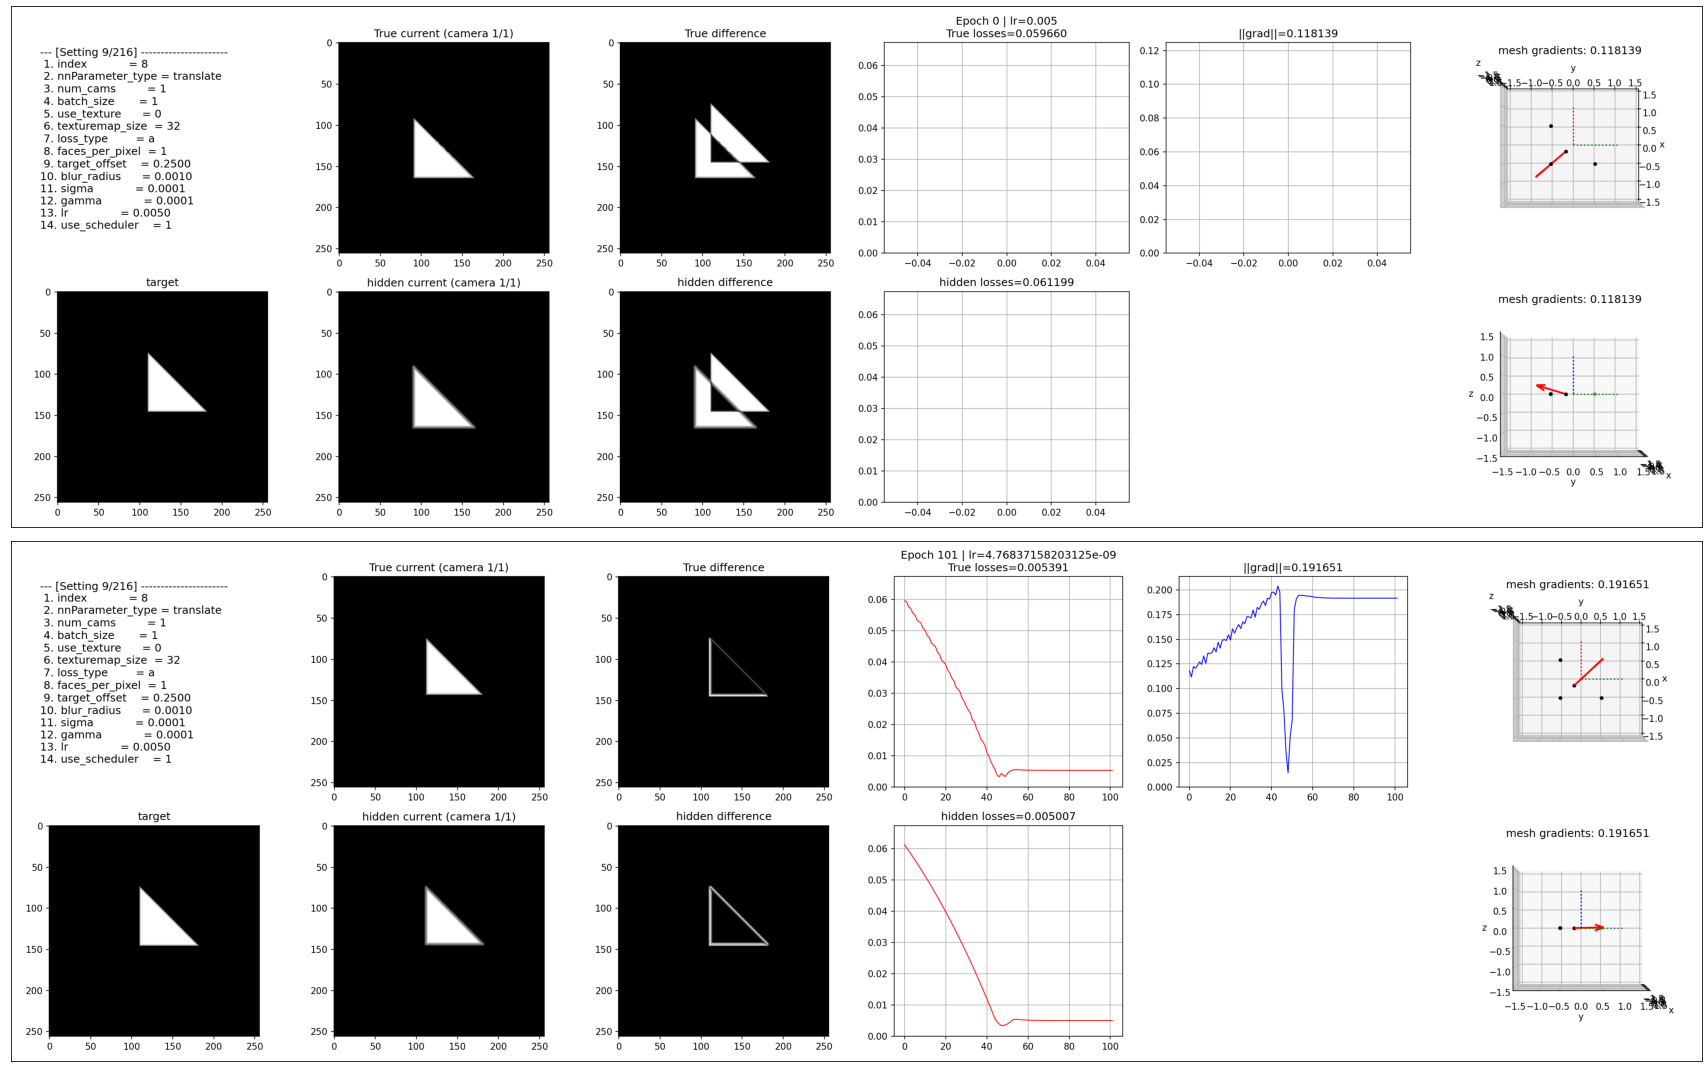

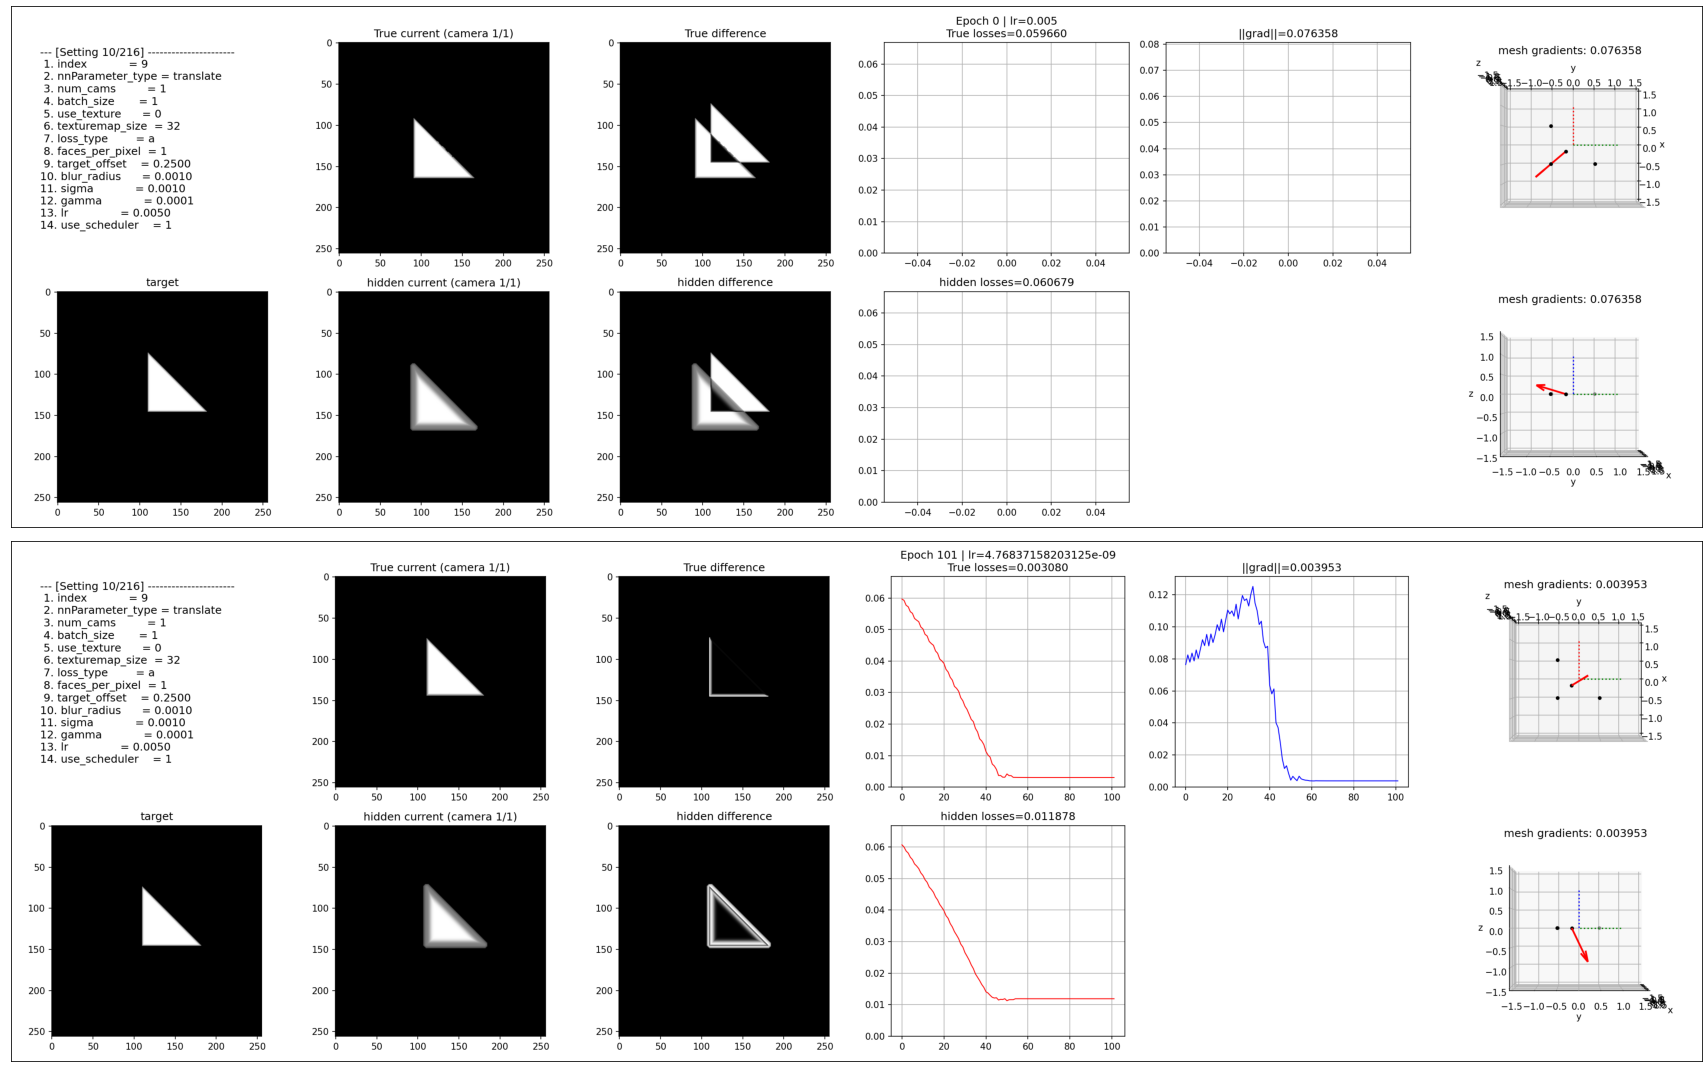

In [297]:
for i in range(len(plots_converged1)):
    fig, ax = plt.subplots(2, 1, figsize=(30, 15), tight_layout=True)
    ax[0].imshow(plots_converged1[i])
    ax[1].imshow(plots_converged2[i])
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()
    print()

# Fetch data with desired parameters

In [78]:
target_p = {
'index': None,
'nnParameter_type': 'translate',
'num_cams': 16,
'use_texture': False,
'loss_type': 'a',
'faces_per_pixel': 1,
'target_offset': 0.1,
'blur_radius': None,
'sigma': 0.0001,
'gamma': 0.0001
}

def is_matched(curr, target):
    if target != None:
        print(curr, '==', target, ':', curr==target)
        return curr == target
    else:
        return True

matched_p = []
for p in params:
    matched = True
    for k in target_p.keys():
        matched = is_matched(p[k], target_p[k]) and matched
    if matched:
        matched_p.append(p)
    break
print('matched: {}, unmatched: {}'.format(len(matched_p), len(params)-len(matched_p)))
print(matched_p)

translate == translate : True
16 == 16 : True
False == False : True
a == a : True
1 == 1 : True
0.1 == 0.1 : True
0.0001 == 0.0001 : True
0.0001 == 0.0001 : True
matched: 1, unmatched: 575
[{'index': 0, 'nnParameter_type': 'translate', 'num_cams': 16, 'batch_size': 8, 'use_texture': False, 'texturemap_size': 32, 'loss_type': 'a', 'faces_per_pixel': 1, 'target_offset': 0.1, 'blur_radius': 0, 'sigma': 0.0001, 'gamma': 0.0001, 'lr': 0.005, 'use_scheduler': True}]


In [ ]:
in_dir = './6b_data/output/triangle'
subfolders = [f.path for f in os.scandir(in_dir) if f.is_dir()]
subfolders.sort(key=natural_keys)

for path in subfolders:
    
